In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv", header=None, error_bad_lines=False)

# Define the features and the outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

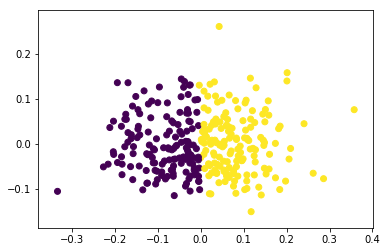

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      84  65
1      55  99


In [3]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

In [4]:
# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

Comparing k-means and mini batch k-means solutions:
col_0    0    1
row_0          
0        0  154
1      149    0


# Assignment
Your task is to take the  k-means code here and see what happens when you change the value of  k . 

What solution, if any, do you find most compelling? 

Does complexity start to become an issue with this data set? 

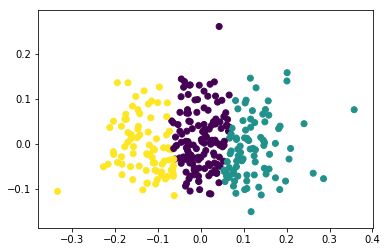

Comparing k-means clusters against the data, k = 3
col_0   0   1
row_0        
0      65  70
1      25  61
2      49  33


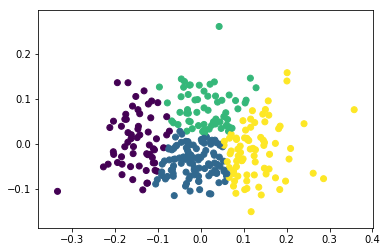

Comparing k-means clusters against the data, k = 4
col_0   0   1
row_0        
0      40  21
1      37  67
2      42  20
3      20  56


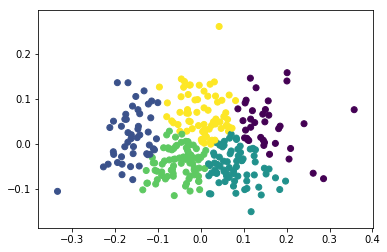

Comparing k-means clusters against the data, k = 5
col_0   0   1
row_0        
0      15  21
1      36  12
2      14  58
3      34  45
4      40  28


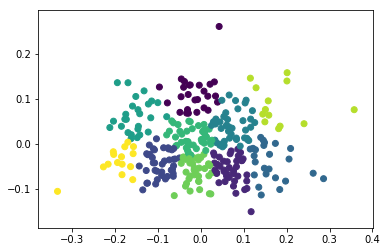

Comparing k-means clusters against the data, k = 10
col_0   0   1
row_0        
0      15  11
1       7  34
2      15  24
3       4  20
4      23  20
5      20   6
6      23  18
7      14  21
8       7   6
9      11   4


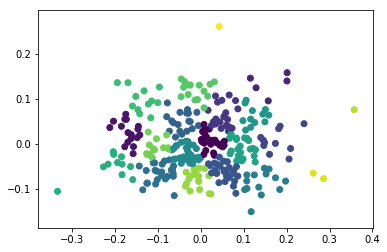

Comparing k-means clusters against the data, k = 20
col_0   0   1
row_0        
0       9  15
1      14   3
2       4   1
3      15   7
4       2   9
5       6  22
6      11   8
7       7  17
8       2  12
9      17  13
10      7   5
11      6  17
12      7   4
13     11   1
14      8   7
15      7   6
16      5  14
17      0   1
18      0   2
19      1   0


In [7]:
# Changing the value of k in normal KMeans:

for k in [3,4,5,10,20]:
    # Calculate predicted values.
    y_pred = KMeans(n_clusters=k, random_state=42).fit_predict(X_pca)

    # Plot the solution.
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
    plt.show()

    # Check the solution against the data.
    print('Comparing k-means clusters against the data,' + ' k = ' + str(k))
    print(pd.crosstab(y_pred, y))

In [9]:
# Changing the value of k in MiniBatchKMeans:
for k in [3,4,5,10,20]:
    minibatchkmeans = MiniBatchKMeans(
        init='random',
        n_clusters=k,
        batch_size=200)
    minibatchkmeans.fit(X_pca)

    # Add the new predicted cluster memberships to the data frame.
    predict_mini = minibatchkmeans.predict(X_pca)

    print('Comparing mini batch k-means clusters against the data,' + ' k  = ' + str(k))
    print(pd.crosstab(predict_mini, y))


Comparing mini batch k-means clusters against the data, k  = 3
col_0   0   1
row_0        
0      18  48
1      65  79
2      56  37
Comparing mini batch k-means clusters against the data, k  = 4
col_0   0   1
row_0        
0      34  55
1      44  38
2      12  45
3      49  26
Comparing mini batch k-means clusters against the data, k  = 5
col_0   0   1
row_0        
0      24  36
1      34  45
2      35  12
3      12  50
4      34  21
Comparing mini batch k-means clusters against the data, k  = 10
col_0   0   1
row_0        
0      17   1
1      14   9
2      21  16
3      13  23
4      14  23
5       7  33
6       4  22
7      21  23
8      16   8
9      12   6
Comparing mini batch k-means clusters against the data, k  = 20
col_0   0   1
row_0        
0       7  20
1       3   2
2       7   1
3      12   7
4      10   7
5       0   1
6       9   8
7      13  12
8       6   3
9       5  15
10      2  18
11      7   5
12     16  12
13      8   4
14      0   7
15      5  12
16      9  